In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [10]:
loans = pd.read_csv("loan_data.csv")

In [11]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 1.0, 'Data Analysis')

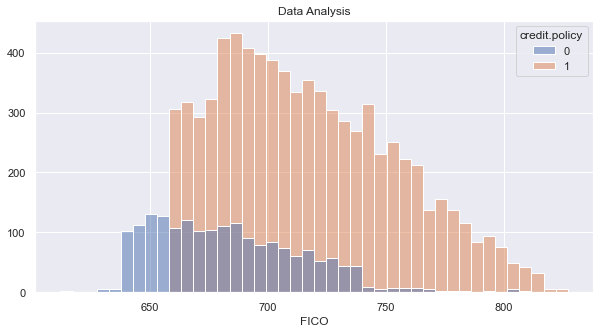

In [37]:
fig = sns.histplot(data=loans, x="fico", hue="credit.policy")
fig.set_xlabel("FICO")
fig.set_ylabel("")
fig.set_title("Data Analysis")

Text(0.5, 1.0, 'Data Analysis')

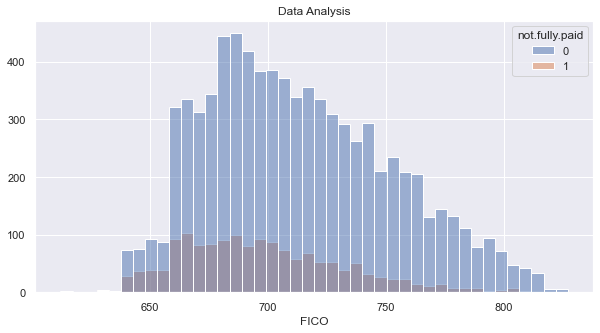

In [36]:
sns.set(rc={'figure.figsize':(10,5)})
fig = sns.histplot(data=loans, x="fico", hue="not.fully.paid")
fig.set_xlabel("FICO")
fig.set_ylabel("")
fig.set_title("Data Analysis")

Text(0, 0.5, 'Count')

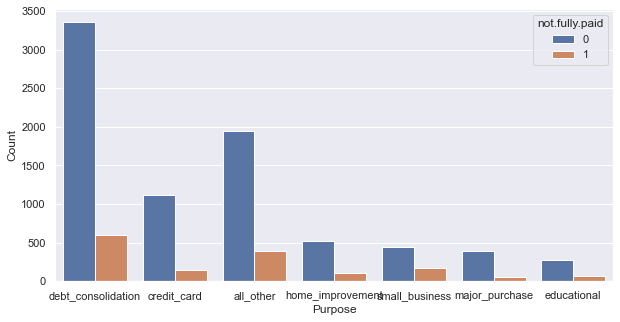

In [40]:
fig = sns.countplot(data=loans, x="purpose", hue="not.fully.paid")
fig.set_xlabel("Purpose")
fig.set_ylabel("Count")

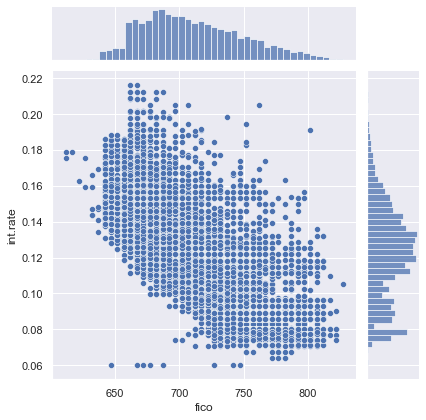

In [41]:
sns.jointplot(data=loans, x="fico", y="int.rate")

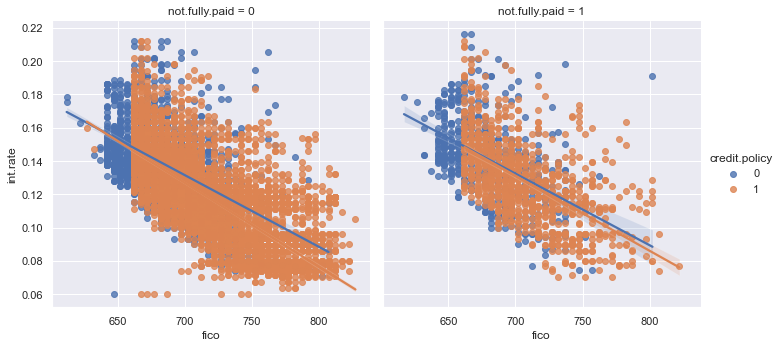

In [45]:
sns.lmplot(data=loans, x="fico", y="int.rate", hue="credit.policy", col="not.fully.paid")

In [46]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [55]:
cat_feats= ["purpose"]

In [57]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop("not.fully.paid", axis=1), 
                                                    final_data["not.fully.paid"], test_size=0.3, random_state=101)

In [68]:
dtree = DecisionTreeClassifier()

In [69]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
pred_dtree = dtree.predict(X_test)

In [73]:
print("Confusion Matrix: \n", confusion_matrix(y_test, pred_dtree))
print("\n Classification Report: \n", classification_report(y_test, pred_dtree))

Confusion Matrix: 
 [[1987  444]
 [ 344   99]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [82]:
rfor = RandomForestClassifier(n_estimators=300)

In [83]:
rfor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [84]:
pred_rfor = rfor.predict(X_test)

In [85]:
print("Confusion Matrix: \n", confusion_matrix(y_test, pred_rfor))
print("\n Classification Report: \n", classification_report(y_test, pred_rfor))

Confusion Matrix: 
 [[2422    9]
 [ 434    9]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

